In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [3]:
df = pd.read_csv(r'C:\Code\VN-Index\Project\Data preprocessing\Data\Data_preprocessing\vi_mo.csv')

In [4]:
df.head()

,Unnamed: 0,Thoi gian,Chi so do la My,Chi so gia tieu dung,Chi so gia vang,Chi so dau
0,0,1/2013,99.92,101.25,98.27,100.00
1,1,1/2014,99.94,100.69,98.18,82.65
2,2,1/2015,100.23,99.80,100.55,73.43
3,3,1/2016,100.18,100.00,99.77,44.75
4,4,1/2017,99.93,100.46,99.82,87.61


In [5]:
df1 = pd.read_csv("C:\Code\VN-Index\Raw Data\VN Index Historical Data (months).csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\buitu\AppData\Local\Temp\ipykernel_12628\3126083844.py:1: SyntaxWarning: invalid escape sequence '\C'
  df1 = pd.read_csv("C:\Code\VN-Index\Raw Data\VN Index Historical Data (months).csv")


In [6]:
df1.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,09/01/2024,"1,251.71","1,283.87","1,283.87","1,244.79",NaN,-2.50%
1,08/01/2024,"1,283.87","1,251.51","1,290.45","1,184.53",15.47B,2.59%
2,07/01/2024,"1,251.51","1,245.32","1,297.96","1,218.65",15.64M,0.50%
3,06/01/2024,"1,245.32","1,261.72","1,306.01","1,240.15",18.12M,-1.30%
4,05/01/2024,"1,261.72","1,212.13","1,285.63","1,206.28",19.39M,4.32%


In [7]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv(r'C:\Code\VN-Index\Project\Data preprocessing\Data\Data_preprocessing\vi_mo.csv')

# Specify columns to negate
columns_to_negate = ['Chi so do la My', 'Chi so gia tieu dung', 'Chi so gia vang', 'Chi so dau']

# Negate the specified columns
df[columns_to_negate] = ((df[columns_to_negate] * -1) + 100) * -1

# Save the modified DataFrame to a CSV file, including 'Thoi gian' column
output_file = r'C:\Code\VN-Index\Project\Data preprocessing\Data\Data_preprocessing\modified_data_with_time.csv'
df.to_csv(output_file, index=False)

# Print the modified DataFrame to confirm changes
print(df)


     Unnamed: 0 Thoi gian  Chi so do la My  Chi so gia tieu dung  \
0             0    1/2013            -0.08                  1.25   
1             1    1/2014            -0.06                  0.69   
2             2    1/2015             0.23                 -0.20   
3             3    1/2016             0.18                 -0.00   
4             4    1/2017            -0.07                  0.46   
..          ...       ...              ...                   ...   
135         135    9/2019            -0.11                  0.32   
136         136    9/2020            -0.05                  0.12   
137         137    9/2021            -0.48                 -0.62   
138         138    9/2022             0.53                  0.40   
139         139    9/2023             1.53                  1.08   

     Chi so gia vang  Chi so dau  
0              -1.73       -0.00  
1              -1.82      -17.35  
2               0.55      -26.57  
3              -0.23      -55.25  
4       

In [8]:
df2= pd.read_csv(r'C:\Code\VN-Index\Project\Data preprocessing\Data\Data_preprocessing\modified_data_with_time.csv')
df2.head()

,Unnamed: 0,Thoi gian,Chi so do la My,Chi so gia tieu dung,Chi so gia vang,Chi so dau
0,0,1/2013,-0.08,1.25,-1.73,-0.00
1,1,1/2014,-0.06,0.69,-1.82,-17.35
2,2,1/2015,0.23,-0.20,0.55,-26.57
3,3,1/2016,0.18,-0.00,-0.23,-55.25
4,4,1/2017,-0.07,0.46,-0.18,-12.39


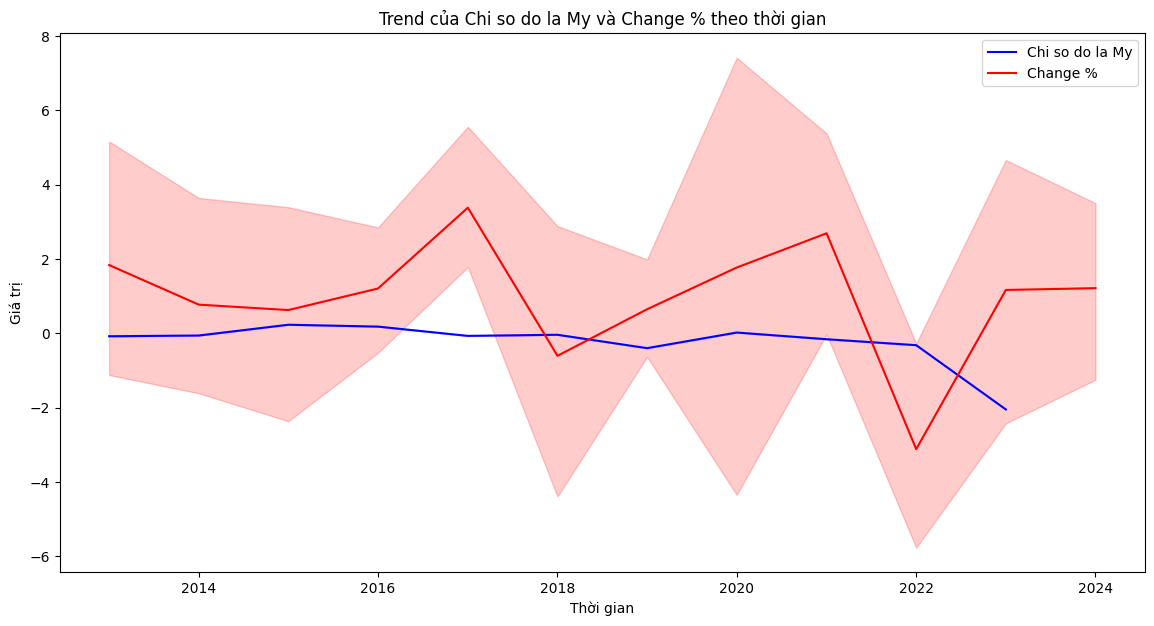

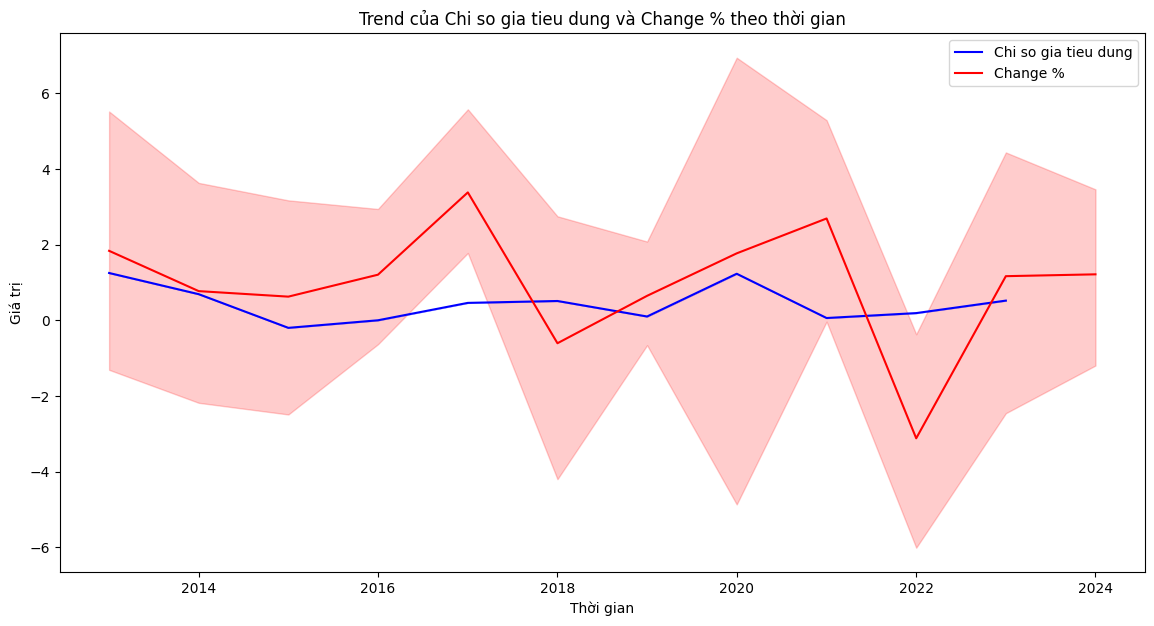

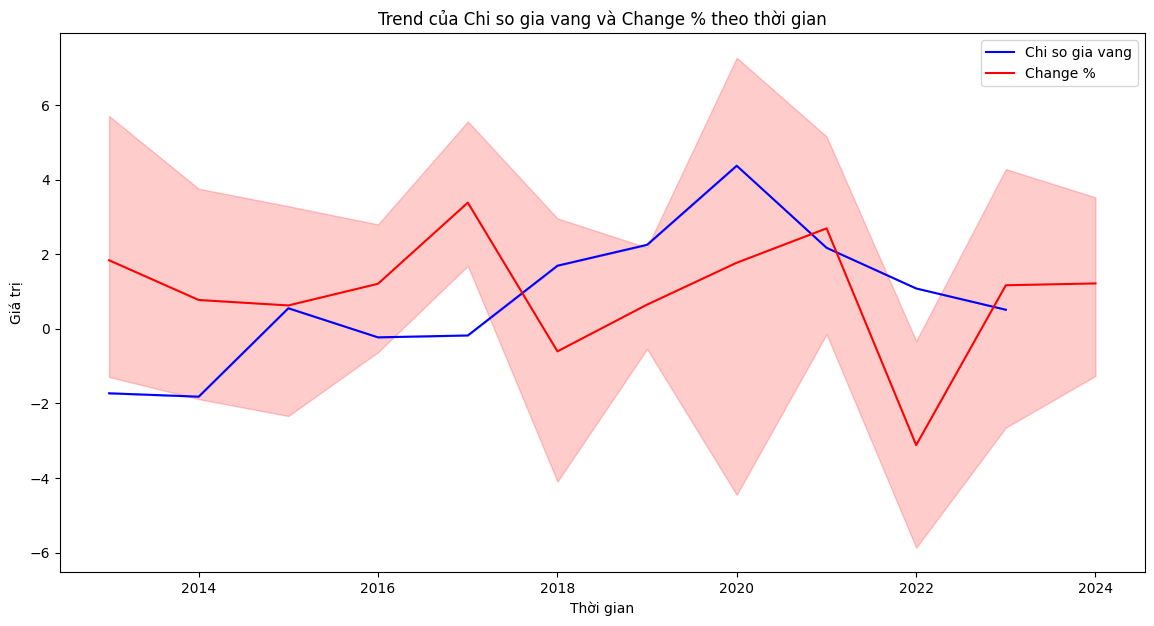

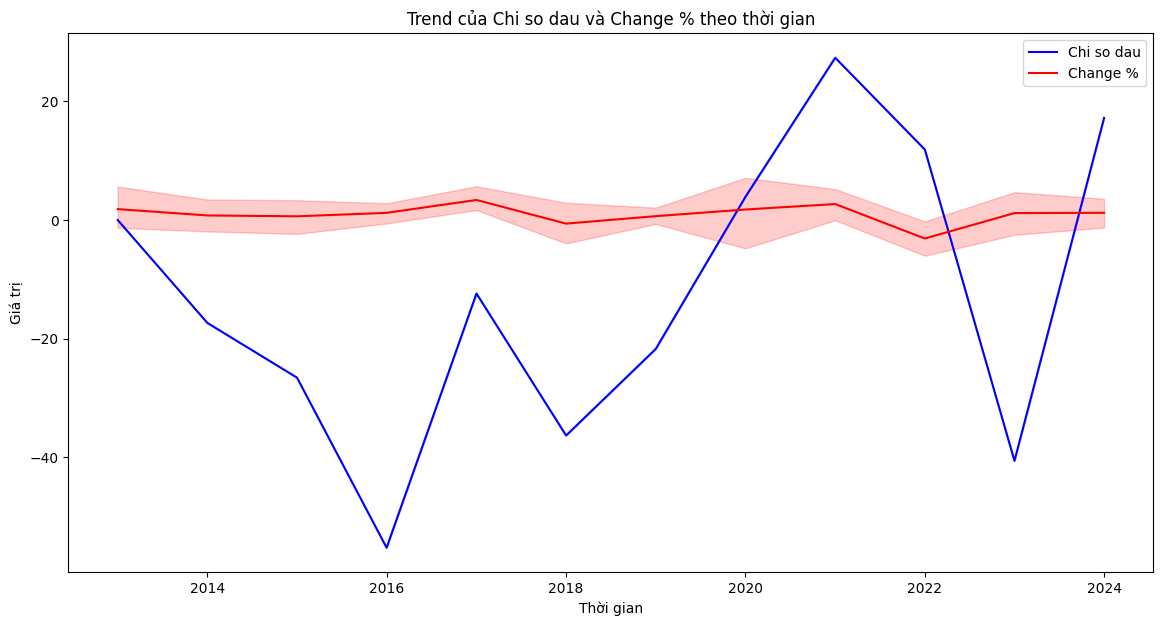

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Chuyển đổi định dạng của cột 'Thoi gian' trong df2
df2['Thoi gian'] = pd.to_datetime(df2['Thoi gian'], format='%m/%Y')

# Chuyển đổi định dạng của cột 'Date' trong df1 và sắp xếp từ quá khứ đến hiện tại
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y')
df1 = df1.sort_values(by='Date')

# 2. Xử lý cột 'Change %' trong df1: Loại bỏ dấu % và chuyển thành số
df1['Change %'] = df1['Change %'].str.replace('%', '').astype(float)

# 3. Lấy giá trị năm-tháng để ghép dữ liệu
df2['Thoi gian'] = df2['Thoi gian'].dt.to_period('M').dt.to_timestamp()
df1['Date'] = df1['Date'].dt.to_period('M').dt.to_timestamp()

# 4. Ghép hai DataFrame dựa trên cột thời gian chung
merged_df = pd.merge(df2, df1[['Date', 'Change %']], left_on='Thoi gian', right_on='Date')

# 5. Xóa cột 'Date' thừa sau khi merge
merged_df.drop('Date', axis=1, inplace=True)

# 6. Visualize theo thời gian
# Danh sách các chỉ số cần vẽ cùng với Change %
columns_to_analyze = ['Chi so do la My', 'Chi so gia tieu dung', 'Chi so gia vang', 'Chi so dau']

for column in columns_to_analyze:
    plt.figure(figsize=(14, 7))

    # Vẽ biểu đồ đường cho từng chỉ số và Change % theo thời gian
    # Vẽ biểu đồ đường không có dải tin cậy
    sns.lineplot(data=merged_df, x='Thoi gian', y=column, label=column, color='blue')
    sns.lineplot(data=merged_df, x='Thoi gian', y='Change %', label='Change %', color='red')


    plt.title(f'Trend của {column} và Change % theo thời gian')
    plt.xlabel('Thời gian')
    plt.ylabel('Giá trị')
    plt.legend()
    plt.show()


In [11]:
# Tính toán các thống kê cho các cột cần phân tích
columns_to_analyze = ['Chi so do la My', 'Chi so gia tieu dung', 'Chi so gia vang', 'Chi so dau', 'Change %']

# Tạo một DataFrame mới để lưu các giá trị độ lệch chuẩn và phương sai
stats_df = pd.DataFrame(index=columns_to_analyze, columns=['Mean', 'Variance', 'Standard Deviation'])

for column in columns_to_analyze:
    # Tính giá trị trung bình (mean)
    mean_value = merged_df[column].mean()
    
    # Tính phương sai (variance)
    variance_value = merged_df[column].var()
    
    # Tính độ lệch chuẩn (standard deviation)
    std_dev_value = merged_df[column].std()
    
    # Gán giá trị vào DataFrame
    stats_df.loc[column] = [mean_value, variance_value, std_dev_value]

# Hiển thị kết quả
print("Thống kê chi tiết về độ biến động của dữ liệu:")
print(stats_df)


Thống kê chi tiết về độ biến động của dữ liệu:
                           Mean    Variance Standard Deviation
Chi so do la My           -0.25    0.357728           0.598104
Chi so gia tieu dung   0.437273    0.208857           0.457008
Chi so gia vang        0.787273    3.025302            1.73934
Chi so dau           -13.122766  579.210907          24.066801
Change %               0.959504   33.893383           5.821802
